### Arquivo para Balanceamento do Dataset

In [8]:
import os
import shutil
import random
from PIL import Image
import matplotlib.pyplot as plt

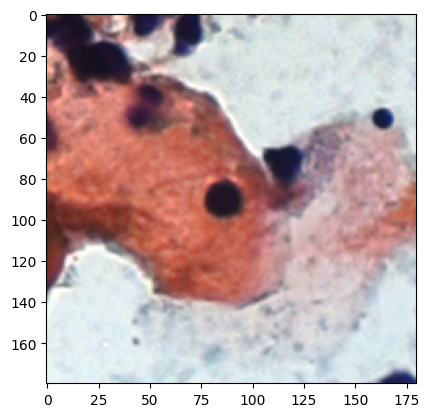

In [23]:
img = Image.open("../../data/base_recortada/Negative for intraepithelial lesion/5.png").convert("RGBA")
plt.imshow(img) 

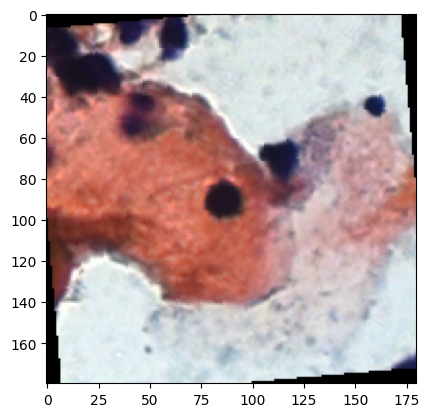

In [10]:
flipped = img.rotate(5) 
plt.imshow(flipped)

Angulo gerado: 193


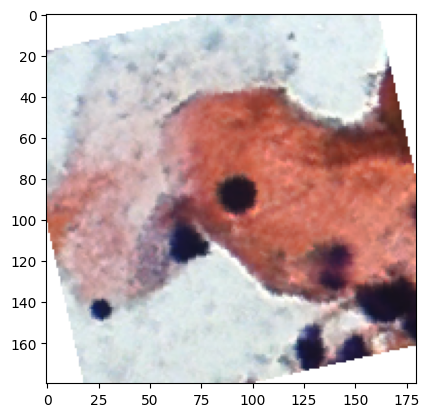

In [29]:
# codigo para rotacionar a imagem com um numero randomico

def random_rotate_img(img):
  
  random_angle = random.randint(1,360)
  
  print(f"Angulo gerado: {random_angle}")
  
  img = img.rotate(random_angle)

  new_img = Image.new('RGBA', img.size, 'white')

  Alpha_Image = Image.composite(img, new_img, img)

  Alpha_Image = Alpha_Image.convert(img.mode)

  return Alpha_Image


plt.imshow(random_rotate_img(img=img))

In [9]:
def listaImg(path_list):
  lista = {}

  for each in path_list:
    name = each.split("/")
    name = name[len(name)-1]
    all_image = [f for f in os.listdir(each) if os.path.isfile(os.path.join(each, f))]
    
    all_images_path_complete = []    
    for each_img in all_image:
        all_images_path_complete.append(each+ "/" + each_img)
    lista[name] = all_images_path_complete
    

    print(f"Quantidade de imagens no path: {name} é ----> {len(lista[name])}")
  return lista

In [11]:
lista_img = listaImg(["../../data/base_treinamento/train/Negative for intraepithelial lesion", "../../data/base_treinamento/train/Positive for intraepithelial lesion"])

Quantidade de imagens no path: Negative for intraepithelial lesion é ----> 3803
Quantidade de imagens no path: Positive for intraepithelial lesion é ----> 3804


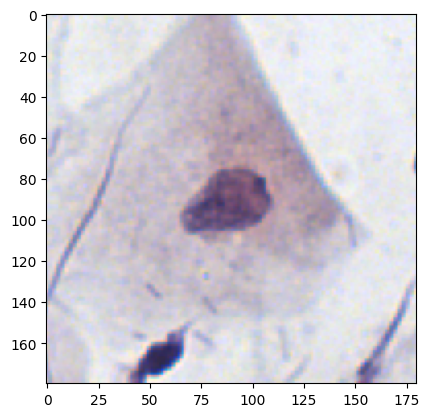

In [22]:
# ler todas as imagem do folder

def myaugment(lista_img, qtd):
  for i in range(qtd):
    
    total_img = len(lista_img)
    
    img_aleatoria = random.randint(0, total_img-1)
    
    path = lista_img[img_aleatoria]
    
    img = Image.open(path)
    
    plt.imshow(img)
    
    new_path = path.split("/")
    new_path.pop(len(new_path)-1)
    new_path = "/".join(new_path) + "/"
    
    numero_random = random.randint(0,10000)
    
    Image.save(new_path + f"augmentation_{numero_random}")
    
    
    
myaugment(lista_img=lista_img["Negative for intraepithelial lesion"], qtd=20)

In [32]:

# def augment_images(image_path, output_path, num_images):
    
#     if not os.path.exists(output_path):
#         os.makedirs(output_path)
    
#     transformations = [
#         lambda img: img.rotate(90),
#         lambda img: img.rotate(180),
#         lambda img: img.rotate(270),
#         lambda img: img.transpose(Image.FLIP_LEFT_RIGHT),
#         lambda img: img.transpose(Image.FLIP_TOP_BOTTOM),
#         lambda img: img.rotate(45),
#         lambda img: img.rotate(135),
#         lambda img: img.rotate(225),
#         lambda img: img.rotate(315)
#     ]
    
#     image_files = [f for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]
    
#     for image_file in image_files:
#         src_path = os.path.join(image_path, image_file)
#         dst_path = os.path.join(output_path, image_file)
#         shutil.copy(src_path, dst_path)
    
#     current_image_count = len(os.listdir(output_path))
#     images_to_add = num_images - current_image_count
    
#     if images_to_add > 0:
#         print(f"Precisando adicionar {images_to_add} imagens com aumentos.")
        
#         existing_images = [f for f in os.listdir(output_path) if os.path.isfile(os.path.join(output_path, f))]
        
#         while images_to_add > 0:
#             for image_file in random.choices(existing_images, k=images_to_add):
#                 if images_to_add <= 0:
#                     break
                
#                 src_path = os.path.join(output_path, image_file)
#                 image = Image.open(src_path).convert("RGB")
                
#                 for transform in transformations:
#                     if images_to_add <= 0:
#                         break
#                     transformed_image = transform(image)
#                     new_image_path = os.path.join(output_path, f"aug_{images_to_add}_{image_file}")
#                     transformed_image.save(new_image_path)
#                     print(f"Imagem salva: {new_image_path}")
#                     images_to_add -= 1

#     print("Balanceamento concluído.")




In [33]:
# all_class_path = os.listdir("../../data/base_balanceada/train/")
# # all_class_path.pop(4)
# all_class_path

In [34]:
# for each in all_class_path:
#   source_path = f'../../data/base_balanceada/train/{each}/'  
#   output_path = f'../../data/base_treinamento/train/{each}/' 
#   # source_path = f'../../data/base_balanceada/test/{each}/'  
#   # output_path = f'../../data/base_treinamento/test/{each}/' 
#   # num_images = 600 
#   num_images = 5500 
#   augment_images(source_path, output_path, num_images)


### Mover Pasta não balanceadas para diretorio de treinamento

In [35]:
# cwd = os.getcwd()
# # diretorio_train = os.path.join(cwd, "..", ".." ,"data", "base_balanceada", "train", "Negative for intraepithelial lesion")
# diretorio_test = os.path.join(cwd, "..", ".." ,"data", "base_balanceada", "test")
# # diretorio_validacao = os.path.join(cwd, "..", ".." ,"data", "base_balanceada", "validation")


# # destino_train = os.path.join(cwd, "..", ".." ,"data", "base_treinamento", "train")
# destino_test = os.path.join(cwd, "..", ".." ,"data", "base_treinamento")
# # destino_validacao = os.path.join(cwd, "..", ".." ,"data", "base_treinamento")


# # if not os.path.exists(destino_train):
# #   os.makedirs(destino_train)
# if not os.path.exists(destino_test):
#   os.makedirs(destino_test)
# # if not os.path.exists(destino_validacao):
#   # os.makedirs(destino_validacao)
  


# # shutil.move(diretorio_train, destino_train)
# shutil.move(diretorio_test, destino_test)
# # shutil.move(diretorio_validacao, destino_validacao)

### Balanceamento excluindo Imagens

In [9]:
path_list = [
 "../../data/base_recortada/Negative for intraepithelial lesion",
 "../../data/base_recortada/Positive for intraepithelial lesion",
]

In [17]:

# LISTAR TODAS AS IMAGENS DE UM PATH
lista = {}

for each in path_list:
  name = each.split("/")
  name = name[len(name)-1]
  all_image = [f for f in os.listdir(each) if os.path.isfile(os.path.join(each, f))]
  
  all_images_path_complete = []    
  for each_img in all_image:
      all_images_path_complete.append(each+ "/" + each_img)
  lista[name] = all_images_path_complete
  

  print(f"Quantidade de imagens no path: {name} é ----> {len(lista[name])}")


Quantidade de imagens no path: Negative for intraepithelial lesion é ----> 4755
Quantidade de imagens no path: Positive for intraepithelial lesion é ----> 4755


In [18]:
diff = len(lista["Negative for intraepithelial lesion"]) - len(lista["Positive for intraepithelial lesion"])
diff

0

In [16]:
# EXCLUINDO QUANTIDADE DE IMAGENS DE UM PATCH
# path_excluido = lista["Positive for intraepithelial lesion"]
path_excluido = lista["Negative for intraepithelial lesion"]

for i, each in enumerate(path_excluido):
  if i == diff:
    break
  print(each)
  os.remove(each)
  
  

../../data/base_recortada/Negative for intraepithelial lesion/1000.png
../../data/base_recortada/Negative for intraepithelial lesion/1001.png
../../data/base_recortada/Negative for intraepithelial lesion/1002.png
../../data/base_recortada/Negative for intraepithelial lesion/1003.png
../../data/base_recortada/Negative for intraepithelial lesion/10034.png
../../data/base_recortada/Negative for intraepithelial lesion/10037.png
../../data/base_recortada/Negative for intraepithelial lesion/10038.png
../../data/base_recortada/Negative for intraepithelial lesion/10039.png
../../data/base_recortada/Negative for intraepithelial lesion/10040.png
../../data/base_recortada/Negative for intraepithelial lesion/10041.png
../../data/base_recortada/Negative for intraepithelial lesion/10042.png
../../data/base_recortada/Negative for intraepithelial lesion/10043.png
../../data/base_recortada/Negative for intraepithelial lesion/10044.png
../../data/base_recortada/Negative for intraepithelial lesion/10045.